<a href="https://colab.research.google.com/github/raju-sharma/Game_of_life/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from matplotlib import pyplot as plt
import os
import cv2
import numpy as np
from numpy.random import randint
from numpy.random import randn
from numpy import ones
from numpy import vstack

In [ ]:
# import tensorflow as tf

# # Create a TensorFlow session with a GPU device
# session_config = tf.compat.v1.ConfigProto()
# session_config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=session_config)


In [ ]:
 !unzip SpinnerDolphin.zip

Archive:  SpinnerDolphin.zip
  inflating: SpinnerDolphin/7100300A.png  
  inflating: SpinnerDolphin/7100300C.png  
  inflating: SpinnerDolphin/7100300G.png  
  inflating: SpinnerDolphin/7100300H.png  
  inflating: SpinnerDolphin/7100300J.png  
  inflating: SpinnerDolphin/7100401A.png  
  inflating: SpinnerDolphin/7100401B.png  
  inflating: SpinnerDolphin/7100401C.png  
  inflating: SpinnerDolphin/7100401D.png  
  inflating: SpinnerDolphin/7100401E.png  
  inflating: SpinnerDolphin/7100401F.png  
  inflating: SpinnerDolphin/7100401G.png  
  inflating: SpinnerDolphin/7100401H.png  
  inflating: SpinnerDolphin/7100401I.png  
  inflating: SpinnerDolphin/7100700C.png  
  inflating: SpinnerDolphin/7100700O.png  
  inflating: SpinnerDolphin/71008001.png  
  inflating: SpinnerDolphin/71008002.png  
  inflating: SpinnerDolphin/71008008.png  
  inflating: SpinnerDolphin/71008009.png  
  inflating: SpinnerDolphin/7100800D.png  
  inflating: SpinnerDolphin/7100800L.png  
  inflating: SpinnerDolph

In [ ]:
# Load images from the folder
def load_images_from_folder(folder_path="SpinnerDolphin"):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            labels.append(1)

    # Convert the list of images to a NumPy array
    images_array = np.array(images)
    labels_array = np.array(labels)

    # Normalize pixel values to the range [0, 1]
    # images_array = images_array / 255.0

    return images_array, labels_array

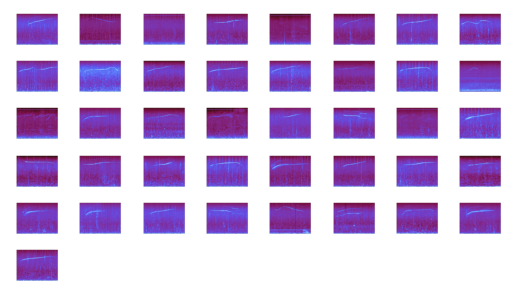

In [ ]:
X_real, y_real = load_images_from_folder()
for i in range(len(X_real)) :
  plt.subplot(8,8,i+1)
  plt.axis("off")
  plt.imshow(X_real[i])
plt.show()

In [ ]:
X_real.shape

(41, 480, 640, 3)

In [ ]:
# Define the discriminator model
def define_discriminator(in_shape=(480, 640, 3)):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 240, 320, 64)      1792      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 240, 320, 64)      0         
                                                                 
 dropout_16 (Dropout)        (None, 240, 320, 64)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 120, 160, 64)      36928     
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 120, 160, 64)      0         
                                                                 
 dropout_17 (Dropout)        (None, 120, 160, 64)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 80, 128)     

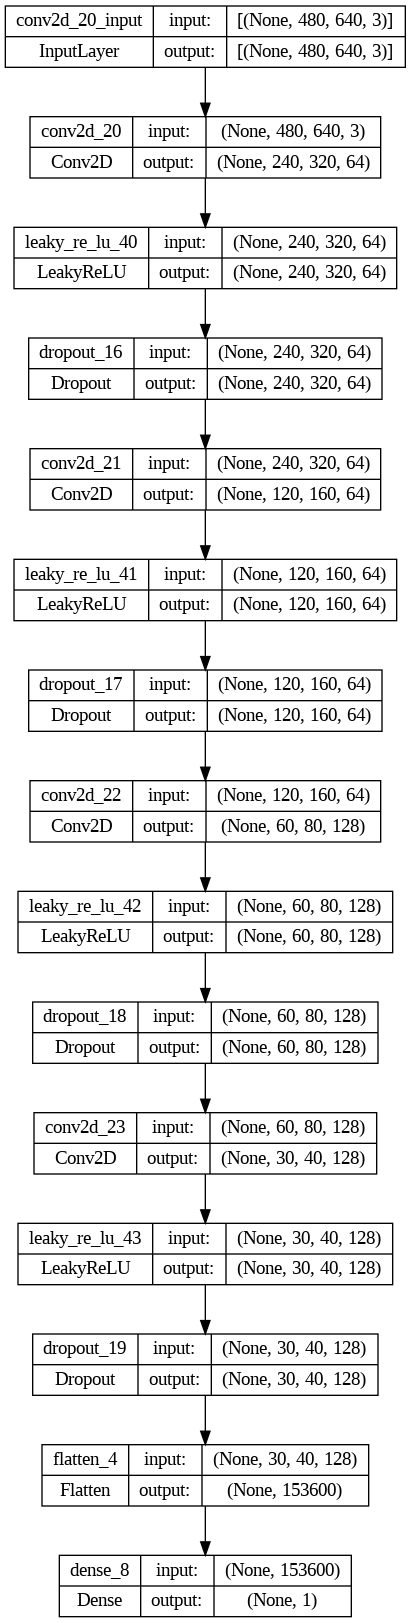

In [ ]:
# Define the discriminator model
d_model = define_discriminator()
# Summarize the model
d_model.summary()
# Plot the model
plot_model(d_model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def load_real_samples():
 # load mnist dataset
 trainX, _ = load_images_from_folder()
 # convert from unsigned ints to floats
 X = trainX.astype('float32')
 # scale from [0,255] to [-1,1]
 X = (X - 127.5)/ 127.5
 return X

In [ ]:
X_images = load_real_samples()
X_images.shape

(41, 480, 640, 3)

In [ ]:
# X_images[0]

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
 # choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = ones((n_samples, 1))
 return X, y

In [ ]:
X,y = generate_real_samples(X_images, 8)
X.shape

(8, 480, 640, 3)

In [ ]:
def generate_fake_samples(n_samples):
 # generate uniform random numbers in [0,1]
 X = rand(480 * 640 * 3* n_samples)
 # reshape into a batch of grayscale images
 X = -1 + X*2
 X = X.reshape((n_samples, 480, 640, 3))
 # generate 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

In [ ]:
X,y = generate_fake_samples(8)
X.shape

(8, 480, 640, 3)

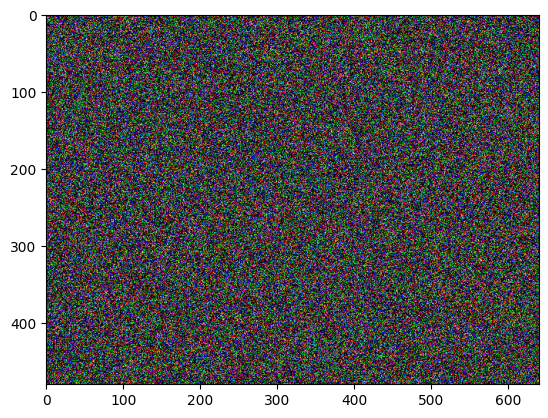

In [ ]:
plt.imshow(X[2])
plt.show()

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=10, n_batch=16):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=50% fake=0%
>2 real=100% fake=0%
>3 real=100% fake=12%
>4 real=100% fake=100%
>5 real=100% fake=100%
>6 real=100% fake=100%
>7 real=100% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%


In [ ]:
# Define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # Foundation for 20x15 image (480x640 / 32)
    n_nodes = 32 *  15 *20
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((15, 20, 32)))

    # Upsample to 40x30
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 60*80
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 120*160
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 240*320
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Upsample to 480*640
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Output layer with 3 channels (for RGB) and tanh activation
    model.add(Conv2D(3, (7, 7), activation='tanh', padding='same'))

    return model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 9600)              9609600   
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 9600)              0         
                                                                 
 reshape_4 (Reshape)         (None, 15, 20, 32)        0         
                                                                 
 conv2d_transpose_20 (Conv2  (None, 30, 40, 32)        16416     
 DTranspose)                                                     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 conv2d_transpose_21 (Conv2  (None, 60, 80, 32)        16416     
 DTranspose)                                         

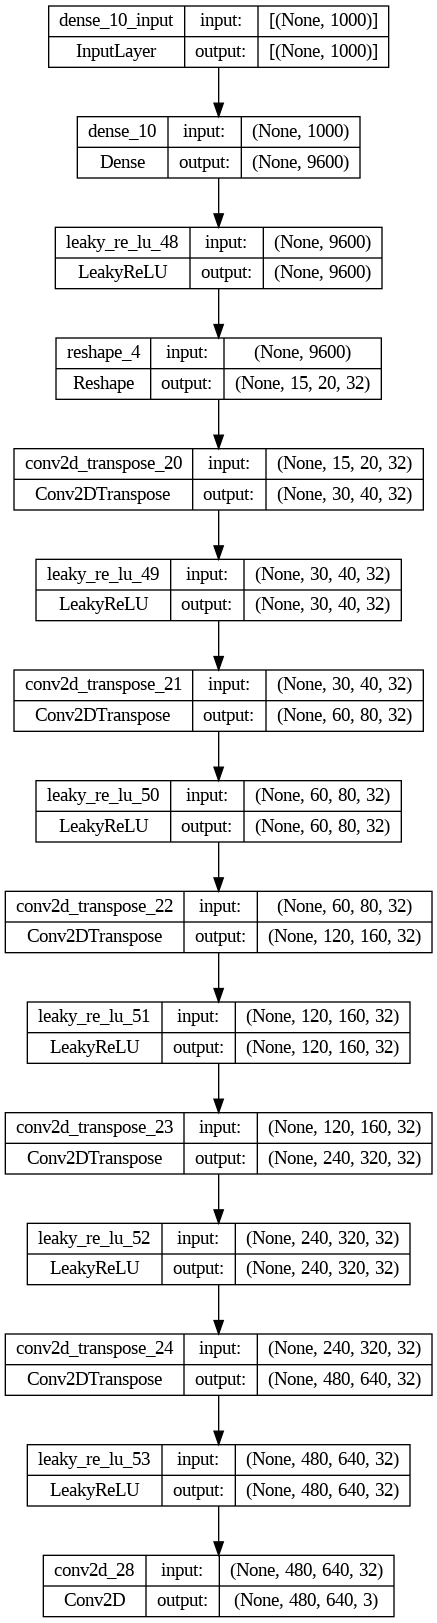

In [ ]:
# Define the size of the latent space
latent_dim = 1000

# Define the generator model
g_model = define_generator(latent_dim)

# Summarize the model
g_model.summary()

# Plot the model
plot_model(g_model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape(n_samples, latent_dim)
 return x_input

In [ ]:
x_input = generate_latent_points(1000, 8)
x_input.shape

(8, 1000)

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
 # generate points in latent space
 x_input = generate_latent_points(latent_dim, n_samples)
 # predict outputs
 X = g_model.predict(x_input)
 # create 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

1/1 [==============================] - 0s 132ms/step


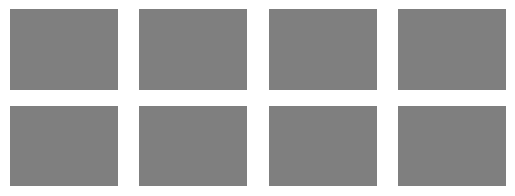

In [ ]:
latent_dim = 1000
model = define_generator(latent_dim)
n_samples = 8
X, _ = generate_fake_samples(model, latent_dim, n_samples)
X = (X + 1) /2.0
for i in range(n_samples) :
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.imshow(X[i])
plt.show()

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
 # make weights in the discriminator not trainable
 d_model.trainable = False
 # connect them
 model = Sequential()
 # add generator
 model.add(g_model)
 # add the discriminator
 model.add(d_model)
 # compile model
 opt = Adam(learning_rate=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt)
 return model

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 480, 640, 3)       9696387   
                                                                 
 sequential_15 (Sequential)  (None, 1)                 413761    
                                                                 
Total params: 10110148 (38.57 MB)
Trainable params: 9696387 (36.99 MB)
Non-trainable params: 413761 (1.58 MB)
_________________________________________________________________


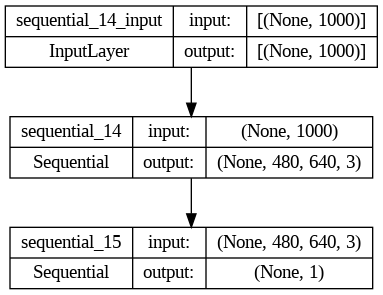

In [ ]:
# size of the latent space
latent_dim = 1000
# create the generator
g_model = define_generator(latent_dim)
# create the discriminator
d_model = define_discriminator()
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
    # Initialize lists to store metrics
    real_acc, fake_acc = [], []
    g_losses, d_losses = [], []

In [ ]:
# def save_plot(examples, epoch, folder_path, n=5):
#     # Create the folder if it doesn't exist
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)
#     # Plot images
#     examples = (examples + 1) / 2.0
#     for i in range(n * n):
#         # Define subplot
#         plt.subplot(n, n, 1 + i)
#         # Turn off axis
#         plt.axis('off')
#         # Plot raw pixel data
#         plt.imshow(examples[i])

#     filename = os.path.join(folder_path, 'generated_plot_e%03d.png' % (epoch+1))
#     plt.savefig(filename)
#     plt.close()  # Close the plot to free memory

def save_plot(examples, epoch, folder_path):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Plot the first image
    plt.imshow((examples[0] + 1) / 2.0)  # Normalize and plot the image
    plt.axis('off')

    filename = os.path.join(folder_path, f'generated_image_e{epoch:03d}.png')
    plt.savefig(filename)
    plt.close()  #

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, folder_path,n_samples=100):
 # prepare real samples
 X_real, y_real = generate_real_samples(dataset, n_samples)
 # evaluate discriminator on real examples
 _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
 # prepare fake examples
 x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
 # evaluate discriminator on fake examples
 _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
 # summarize discriminator performance
 print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
 # save plot
 real_acc.append(acc_real)
 fake_acc.append(acc_fake)
 save_plot(x_fake, epoch,folder_path)
 # save the generator model tile file
 filename = 'generator_model_%03d.h5' % (epoch + 1)
 g_model.save(filename)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=8):
 bat_per_epo = int(dataset.shape[0] / n_batch)
 half_batch = int(n_batch / 2)

 # manually enumerate epochs
 for i in range(n_epochs):
  epoch_d_loss = 0
  epoch_g_loss = 0
  # enumerate batches over the training set
  for j in range(bat_per_epo):
    # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # create training set for the discriminator
    X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
    # update discriminator model weights
    d_loss, _ = d_model.train_on_batch(X, y)
    # prepare points in latent space as input for the generator
    X_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = ones((n_batch, 1))
    # update the generator via the discriminator's error
    g_loss = gan_model.train_on_batch(X_gan, y_gan)
    # summarize loss on this batch
    print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    epoch_d_loss += d_loss
    epoch_g_loss += g_loss

  if (i+1)%50 == 0 :
       d_losses.append(epoch_d_loss/bat_per_epo)
       g_losses.append(epoch_g_loss/bat_per_epo)
       summarize_performance(i, g_model, d_model, dataset, latent_dim,folder_path='generated_output/')


In [ ]:
# size of the latent space
latent_dim = 1000
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

1/1 [==============================] - 0s 130ms/step
>1, 1/5, d=0.662, g=0.691
1/1 [==============================] - 0s 24ms/step
>1, 2/5, d=0.496, g=0.690
1/1 [==============================] - 0s 17ms/step
>1, 3/5, d=0.406, g=0.691
1/1 [==============================] - 0s 17ms/step
>1, 4/5, d=0.370, g=0.693
1/1 [==============================] - 0s 16ms/step
>1, 5/5, d=0.356, g=0.696
1/1 [==============================] - 0s 16ms/step
>2, 1/5, d=0.351, g=0.698
1/1 [==============================] - 0s 17ms/step
>2, 2/5, d=0.350, g=0.700
1/1 [==============================] - 0s 17ms/step
>2, 3/5, d=0.349, g=0.702
1/1 [==============================] - 0s 17ms/step
>2, 4/5, d=0.350, g=0.702
1/1 [==============================] - 0s 17ms/step
>2, 5/5, d=0.352, g=0.701
1/1 [==============================] - 0s 16ms/step
>3, 1/5, d=0.354, g=0.701
1/1 [==============================] - 0s 16ms/step
>3, 2/5, d=0.357, g=0.703
1/1 [==============================] - 0s 18ms/step
>3, 3/5, d=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>Accuracy real: 100%, fake: 100%
1/1 [==============================] - 0s 18ms/step
>51, 1/5, d=0.001, g=8.290
1/1 [==============================] - 0s 19ms/step
>51, 2/5, d=0.001, g=7.400
1/1 [==============================] - 0s 17ms/step
>51, 3/5, d=0.000, g=7.346
1/1 [==============================] - 0s 17ms/step
>51, 4/5, d=0.000, g=6.430
1/1 [==============================] - 0s 17ms/step
>51, 5/5, d=0.001, g=7.935
1/1 [==============================] - 0s 17ms/step
>52, 1/5, d=0.001, g=8.109
1/1 [==============================] - 0s 25ms/step
>52, 2/5, d=0.001, g=7.533
1/1 [==============================] - 0s 27ms/step
>52, 3/5, d=0.001, g=7.206
1/1 [==============================] - 0s 39ms/step
>52, 4/5, d=0.001, g=6.856
1/1 [==============================] - 0s 42ms/step
>52, 5/5, d=0.001, g=6.717
1/1 [==============================] - 0s 16ms/step
>53, 1/5, d=0.000, g=6.613
1/1 [==============================] - 0s 16ms/step
>53, 2/5, d=0.001, g=6.497
1/1 [==============

>Accuracy real: 96%, fake: 100%
1/1 [==============================] - 0s 17ms/step
>101, 1/5, d=1.303, g=0.005
1/1 [==============================] - 0s 17ms/step
>101, 2/5, d=3.480, g=0.412
1/1 [==============================] - 0s 17ms/step
>101, 3/5, d=2.799, g=4.796
1/1 [==============================] - 0s 17ms/step
>101, 4/5, d=0.023, g=5.356
1/1 [==============================] - 0s 17ms/step
>101, 5/5, d=0.013, g=4.771
1/1 [==============================] - 0s 16ms/step
>102, 1/5, d=0.113, g=4.170
1/1 [==============================] - 0s 16ms/step
>102, 2/5, d=0.107, g=3.132
1/1 [==============================] - 0s 16ms/step
>102, 3/5, d=0.065, g=3.115
1/1 [==============================] - 0s 17ms/step
>102, 4/5, d=0.049, g=3.689
1/1 [==============================] - 0s 27ms/step
>102, 5/5, d=0.044, g=2.691
1/1 [==============================] - 0s 28ms/step
>103, 1/5, d=0.050, g=2.792
1/1 [==============================] - 0s 29ms/step
>103, 2/5, d=0.203, g=2.611
1/1 [===

>Accuracy real: 100%, fake: 86%
1/1 [==============================] - 0s 17ms/step
>151, 1/5, d=0.052, g=3.729
1/1 [==============================] - 0s 16ms/step
>151, 2/5, d=0.021, g=2.694
1/1 [==============================] - 0s 17ms/step
>151, 3/5, d=0.062, g=4.537
1/1 [==============================] - 0s 18ms/step
>151, 4/5, d=0.014, g=6.099
1/1 [==============================] - 0s 18ms/step
>151, 5/5, d=0.016, g=5.548
1/1 [==============================] - 0s 18ms/step
>152, 1/5, d=0.028, g=5.420
1/1 [==============================] - 0s 17ms/step
>152, 2/5, d=0.031, g=4.323
1/1 [==============================] - 0s 17ms/step
>152, 3/5, d=0.017, g=6.158
1/1 [==============================] - 0s 27ms/step
>152, 4/5, d=0.063, g=5.122
1/1 [==============================] - 0s 25ms/step
>152, 5/5, d=0.043, g=6.322
1/1 [==============================] - 0s 24ms/step
>153, 1/5, d=0.039, g=4.637
1/1 [==============================] - 0s 27ms/step
>153, 2/5, d=0.109, g=5.181
1/1 [===

1/1 [==============================] - 0s 17ms/step
>201, 1/5, d=0.068, g=5.041
1/1 [==============================] - 0s 17ms/step
>201, 2/5, d=0.027, g=5.105
1/1 [==============================] - 0s 18ms/step
>201, 3/5, d=0.015, g=4.915
1/1 [==============================] - 0s 17ms/step
>201, 4/5, d=0.178, g=8.385
1/1 [==============================] - 0s 18ms/step
>201, 5/5, d=0.144, g=7.737
1/1 [==============================] - 0s 28ms/step
>202, 1/5, d=0.029, g=4.414
1/1 [==============================] - 0s 25ms/step
>202, 2/5, d=0.017, g=3.942
1/1 [==============================] - 0s 25ms/step
>202, 3/5, d=0.013, g=3.917
1/1 [==============================] - 0s 17ms/step
>202, 4/5, d=0.019, g=3.321
1/1 [==============================] - 0s 17ms/step
>202, 5/5, d=0.036, g=5.643
1/1 [==============================] - 0s 18ms/step
>203, 1/5, d=0.070, g=6.322
1/1 [==============================] - 0s 18ms/step
>203, 2/5, d=0.080, g=5.214
1/1 [==============================] - 0

>Accuracy real: 100%, fake: 0%
1/1 [==============================] - 0s 17ms/step
>251, 1/5, d=0.694, g=3.936
1/1 [==============================] - 0s 16ms/step
>251, 2/5, d=0.773, g=0.678
1/1 [==============================] - 0s 17ms/step
>251, 3/5, d=0.457, g=1.633
1/1 [==============================] - 0s 28ms/step
>251, 4/5, d=0.446, g=4.782
1/1 [==============================] - 0s 25ms/step
>251, 5/5, d=0.996, g=0.965
1/1 [==============================] - 0s 31ms/step
>252, 1/5, d=0.477, g=1.196
1/1 [==============================] - 0s 36ms/step
>252, 2/5, d=0.212, g=1.666
1/1 [==============================] - 0s 17ms/step
>252, 3/5, d=0.327, g=1.861
1/1 [==============================] - 0s 17ms/step
>252, 4/5, d=0.261, g=1.773
1/1 [==============================] - 0s 17ms/step
>252, 5/5, d=0.292, g=0.458
1/1 [==============================] - 0s 18ms/step
>253, 1/5, d=0.444, g=2.329
1/1 [==============================] - 0s 19ms/step
>253, 2/5, d=0.353, g=3.251
1/1 [====

>Accuracy real: 100%, fake: 4%
1/1 [==============================] - 0s 17ms/step
>301, 1/5, d=0.232, g=2.820
1/1 [==============================] - 0s 16ms/step
>301, 2/5, d=0.194, g=3.841
1/1 [==============================] - 0s 17ms/step
>301, 3/5, d=0.258, g=3.044
1/1 [==============================] - 0s 28ms/step
>301, 4/5, d=0.104, g=2.529
1/1 [==============================] - 0s 28ms/step
>301, 5/5, d=0.125, g=3.063
1/1 [==============================] - 0s 30ms/step
>302, 1/5, d=0.281, g=4.211
1/1 [==============================] - 0s 19ms/step
>302, 2/5, d=0.233, g=3.272
1/1 [==============================] - 0s 17ms/step
>302, 3/5, d=0.337, g=3.744
1/1 [==============================] - 0s 16ms/step
>302, 4/5, d=0.155, g=1.978
1/1 [==============================] - 0s 16ms/step
>302, 5/5, d=0.114, g=3.363
1/1 [==============================] - 0s 17ms/step
>303, 1/5, d=0.357, g=2.522
1/1 [==============================] - 0s 17ms/step
>303, 2/5, d=0.199, g=2.695
1/1 [====

1/1 [==============================] - 0s 18ms/step
>351, 1/5, d=1.472, g=0.630
1/1 [==============================] - 0s 18ms/step
>351, 2/5, d=0.352, g=2.012
1/1 [==============================] - 0s 28ms/step
>351, 3/5, d=0.312, g=3.525
1/1 [==============================] - 0s 25ms/step
>351, 4/5, d=1.116, g=3.398
1/1 [==============================] - 0s 34ms/step
>351, 5/5, d=0.083, g=5.134
1/1 [==============================] - 0s 31ms/step
>352, 1/5, d=0.089, g=3.567
1/1 [==============================] - 0s 34ms/step
>352, 2/5, d=0.129, g=3.923
1/1 [==============================] - 0s 28ms/step
>352, 3/5, d=0.294, g=0.827
1/1 [==============================] - 0s 30ms/step
>352, 4/5, d=0.594, g=6.752
1/1 [==============================] - 0s 19ms/step
>352, 5/5, d=0.481, g=3.841
1/1 [==============================] - 0s 18ms/step
>353, 1/5, d=0.089, g=3.612
1/1 [==============================] - 0s 17ms/step
>353, 2/5, d=0.152, g=2.650
1/1 [==============================] - 0

>Accuracy real: 100%, fake: 31%
1/1 [==============================] - 0s 17ms/step
>401, 1/5, d=0.071, g=2.565
1/1 [==============================] - 0s 17ms/step
>401, 2/5, d=0.192, g=1.791
1/1 [==============================] - 0s 17ms/step
>401, 3/5, d=0.116, g=2.771
1/1 [==============================] - 0s 16ms/step
>401, 4/5, d=0.077, g=3.292
1/1 [==============================] - 0s 17ms/step
>401, 5/5, d=0.148, g=1.272
1/1 [==============================] - 0s 17ms/step
>402, 1/5, d=0.246, g=3.931
1/1 [==============================] - 0s 17ms/step
>402, 2/5, d=0.068, g=3.835
1/1 [==============================] - 0s 17ms/step
>402, 3/5, d=0.120, g=3.623
1/1 [==============================] - 0s 17ms/step
>402, 4/5, d=0.179, g=3.574
1/1 [==============================] - 0s 17ms/step
>402, 5/5, d=0.106, g=3.728
1/1 [==============================] - 0s 17ms/step
>403, 1/5, d=0.056, g=3.163
1/1 [==============================] - 0s 17ms/step
>403, 2/5, d=0.124, g=3.997
1/1 [===

>Accuracy real: 100%, fake: 46%
1/1 [==============================] - 0s 18ms/step
>451, 1/5, d=0.064, g=3.279
1/1 [==============================] - 0s 16ms/step
>451, 2/5, d=0.103, g=2.424
1/1 [==============================] - 0s 18ms/step
>451, 3/5, d=0.120, g=2.997
1/1 [==============================] - 0s 19ms/step
>451, 4/5, d=0.149, g=4.583
1/1 [==============================] - 0s 18ms/step
>451, 5/5, d=0.094, g=3.390
1/1 [==============================] - 0s 17ms/step
>452, 1/5, d=0.187, g=3.182
1/1 [==============================] - 0s 17ms/step
>452, 2/5, d=0.112, g=2.039
1/1 [==============================] - 0s 18ms/step
>452, 3/5, d=0.173, g=2.602
1/1 [==============================] - 0s 16ms/step
>452, 4/5, d=0.151, g=5.414
1/1 [==============================] - 0s 16ms/step
>452, 5/5, d=0.569, g=2.212
1/1 [==============================] - 0s 17ms/step
>453, 1/5, d=0.433, g=3.050
1/1 [==============================] - 0s 17ms/step
>453, 2/5, d=0.131, g=5.598
1/1 [===

>Accuracy real: 100%, fake: 99%
1/1 [==============================] - 0s 16ms/step
>501, 1/5, d=0.249, g=4.517
1/1 [==============================] - 0s 17ms/step
>501, 2/5, d=0.042, g=2.849
1/1 [==============================] - 0s 17ms/step
>501, 3/5, d=0.063, g=3.116
1/1 [==============================] - 0s 16ms/step
>501, 4/5, d=0.160, g=5.558
1/1 [==============================] - 0s 20ms/step
>501, 5/5, d=0.290, g=3.914
1/1 [==============================] - 0s 17ms/step
>502, 1/5, d=0.085, g=1.766
1/1 [==============================] - 0s 18ms/step
>502, 2/5, d=0.127, g=2.680
1/1 [==============================] - 0s 17ms/step
>502, 3/5, d=0.130, g=3.818
1/1 [==============================] - 0s 28ms/step
>502, 4/5, d=0.257, g=3.762
1/1 [==============================] - 0s 27ms/step
>502, 5/5, d=0.246, g=6.094
1/1 [==============================] - 0s 35ms/step
>503, 1/5, d=0.626, g=2.171
1/1 [==============================] - 0s 25ms/step
>503, 2/5, d=0.287, g=2.933
1/1 [===

>Accuracy real: 100%, fake: 8%
1/1 [==============================] - 0s 17ms/step
>551, 1/5, d=0.123, g=5.286
1/1 [==============================] - 0s 19ms/step
>551, 2/5, d=0.120, g=3.217
1/1 [==============================] - 0s 17ms/step
>551, 3/5, d=0.093, g=4.235
1/1 [==============================] - 0s 17ms/step
>551, 4/5, d=0.075, g=4.564
1/1 [==============================] - 0s 30ms/step
>551, 5/5, d=0.108, g=5.219
1/1 [==============================] - 0s 31ms/step
>552, 1/5, d=0.134, g=2.630
1/1 [==============================] - 0s 29ms/step
>552, 2/5, d=0.399, g=10.683
1/1 [==============================] - 0s 39ms/step
>552, 3/5, d=0.445, g=4.756
1/1 [==============================] - 0s 18ms/step
>552, 4/5, d=0.055, g=2.494
1/1 [==============================] - 0s 16ms/step
>552, 5/5, d=0.222, g=6.158
1/1 [==============================] - 0s 17ms/step
>553, 1/5, d=0.003, g=6.789
1/1 [==============================] - 0s 16ms/step
>553, 2/5, d=0.135, g=3.750
1/1 [===

>Accuracy real: 100%, fake: 0%
1/1 [==============================] - 0s 17ms/step
>601, 1/5, d=2.118, g=10.449
1/1 [==============================] - 0s 17ms/step
>601, 2/5, d=0.891, g=10.171
1/1 [==============================] - 0s 17ms/step
>601, 3/5, d=0.005, g=5.290
1/1 [==============================] - 0s 17ms/step
>601, 4/5, d=0.004, g=5.956
1/1 [==============================] - 0s 19ms/step
>601, 5/5, d=0.025, g=4.144
1/1 [==============================] - 0s 17ms/step
>602, 1/5, d=0.014, g=4.061
1/1 [==============================] - 0s 17ms/step
>602, 2/5, d=0.095, g=4.922
1/1 [==============================] - 0s 17ms/step
>602, 3/5, d=0.025, g=5.760
1/1 [==============================] - 0s 17ms/step
>602, 4/5, d=0.124, g=4.042
1/1 [==============================] - 0s 18ms/step
>602, 5/5, d=0.023, g=3.932
1/1 [==============================] - 0s 17ms/step
>603, 1/5, d=0.051, g=4.892
1/1 [==============================] - 0s 17ms/step
>603, 2/5, d=0.121, g=5.189
1/1 [==

>Accuracy real: 100%, fake: 55%
1/1 [==============================] - 0s 17ms/step
>651, 1/5, d=0.010, g=4.659
1/1 [==============================] - 0s 18ms/step
>651, 2/5, d=0.023, g=3.759
1/1 [==============================] - 0s 17ms/step
>651, 3/5, d=0.024, g=3.898
1/1 [==============================] - 0s 17ms/step
>651, 4/5, d=0.029, g=4.041
1/1 [==============================] - 0s 17ms/step
>651, 5/5, d=0.004, g=4.879
1/1 [==============================] - 0s 17ms/step
>652, 1/5, d=0.023, g=4.636
1/1 [==============================] - 0s 17ms/step
>652, 2/5, d=0.031, g=5.081
1/1 [==============================] - 0s 17ms/step
>652, 3/5, d=0.033, g=4.433
1/1 [==============================] - 0s 17ms/step
>652, 4/5, d=0.045, g=3.984
1/1 [==============================] - 0s 27ms/step
>652, 5/5, d=0.048, g=5.144
1/1 [==============================] - 0s 25ms/step
>653, 1/5, d=0.089, g=3.421
1/1 [==============================] - 0s 24ms/step
>653, 2/5, d=0.096, g=6.356
1/1 [===

>Accuracy real: 100%, fake: 97%
1/1 [==============================] - 0s 17ms/step
>701, 1/5, d=0.026, g=8.354
1/1 [==============================] - 0s 18ms/step
>701, 2/5, d=0.333, g=0.799
1/1 [==============================] - 0s 17ms/step
>701, 3/5, d=0.370, g=5.782
1/1 [==============================] - 0s 25ms/step
>701, 4/5, d=0.013, g=7.988
1/1 [==============================] - 0s 29ms/step
>701, 5/5, d=0.040, g=6.316
1/1 [==============================] - 0s 24ms/step
>702, 1/5, d=0.038, g=5.571
1/1 [==============================] - 0s 25ms/step
>702, 2/5, d=0.012, g=3.485
1/1 [==============================] - 0s 18ms/step
>702, 3/5, d=0.024, g=4.452
1/1 [==============================] - 0s 18ms/step
>702, 4/5, d=0.047, g=4.414
1/1 [==============================] - 0s 18ms/step
>702, 5/5, d=0.017, g=4.625
1/1 [==============================] - 0s 17ms/step
>703, 1/5, d=0.034, g=3.711
1/1 [==============================] - 0s 16ms/step
>703, 2/5, d=0.057, g=4.373
1/1 [===

In [ ]:
d_losses

In [ ]:
import matplotlib.pyplot as plt

# Generate new x-axis tick labels
new_ticks = [i * 50 for i in range(1, 21)]

# Visualize training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(real_acc) + 1), real_acc, label='Real Accuracy', color='b', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(range(1, len(fake_acc) + 1), fake_acc, label='Fake Accuracy', color='r', linestyle='-', linewidth=2, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1 for a little more space above 1
plt.xticks(range(1, 21), new_ticks, rotation=45)  # Set x-axis ticks from 1 to 20 with new labels and rotate them by 45 degrees
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(d_losses) + 1), d_losses, label='Discriminator Loss', color='b', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(range(1, len(g_losses) + 1), g_losses, label='Generator Loss', color='r', linestyle='-', linewidth=2, alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 21), new_ticks, rotation=45)  # Set x-axis ticks from 1 to 20 with new labels and rotate them by 45 degrees
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
latent_dim = 1000
X, _ = generate_fake_samples(g_model, latent_dim, 100)
X = (X + 1) /2.0

In [ ]:
plt.axis("off")
plt.imshow(X[0])
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import os

# # Create a directory to save the images if it doesn't exist
# if not os.path.exists('generated_images_BowheadWhales'):
#     os.makedirs('generated_images_BowheadWhales')

# # Save all images in the array X
# for i, image in enumerate(X):
#     plt.imshow(image)
#     plt.axis("off")
#     plt.savefig(f'generated_images_BowheadWhales/BowheadWhale_{i}.png')  # Save each image with a unique filename
#     plt.close()  # Close the plot to release memory (optional)

In [ ]:
import shutil

shutil.make_archive('generated_output', 'zip', 'generated_output')

In [ ]:
from google.colab import files

files.download('generated_output.zip')

In [ ]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# conf_matrix = [[21,3,0],[0,32,2],[1,0,28]]
# class_labels = ['0','1','2']
# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

In [ ]:
# Generate classification report
# class_report = classification_report(true_labels, predictions, target_names=class_labels)

# print("Classification Report:")
# print(class_report)

In [ ]:
# from sklearn.metrics import classification_report

# # Define the labels for your classes (e.g., 'Class 0', 'Class 1', 'Class 2')
# labels = ['Class 0', 'Class 1', 'Class 2']

# # Define the confusion matrix
# conf_matrix = [[21, 3, 0],
#                [0, 32, 2],
#                [1, 0, 28]]

# # Flatten the confusion matrix
# true_labels = []
# predicted_labels = []
# for true_class, row in enumerate(conf_matrix):
#     for predicted_class, count in enumerate(row):
#         true_labels.extend([true_class] * count)
#         predicted_labels.extend([predicted_class] * count)

# # Generate the classification report
# report = classification_report(true_labels, predicted_labels, target_names=labels)

# # Print the classification report
# print(report)
